In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({'font.size':16}) 

kepler_df = pd.read_csv('temp_kepler_2.csv')

## Solution: Estimate $G \pm \sigma_G$

We're using `curve_fit`, so we need to import it. Remember to add the import statement to the top of your notebook if you don't already have it loaded.

First things first, define the function that we want to fit. We're estimating $G$ by rearranging the equation for Kepler's 3rd law:

$$
T^2 = \dfrac{4 \pi^2}{G} \dfrac{a^3}{M_*}
$$


Our function is then


In [3]:
def keplers_law(a_3_m, g):
    return (4.0 * np.pi**2  * a_3_m / g)

Now we use `curve_fit` to find $G$ and $\sigma_G$

**Note:** The first (few...) times I tried this it didn't work. `curve_fit` got a very strange answer. By providing a starting guess with the `p0` parameter the fit worked properly. The problem was the very large numbers ($10^6$ and $10^{17}$). As we can see from the units in the $T^2$ equation, $G$ will be approximately $\dfrac{10^6}{10^{17}} = 10^{-11}$ m$^{3}$ kg$^{-1}$ s$^{-2}$, so `p0=1e-11` is a reasonable starting guess.

In [4]:
popt, pcov = curve_fit(keplers_law, (kepler_df['a_3_m']), (kepler_df['T_sq']), p0=1e-11)

g = popt[0] 
g_unc = np.sqrt(pcov[0][0])

print("G = {0:.3e} +/- {1:.3e}".format(g, g_unc))


G = 6.753e-11 +/- 1.591e-13


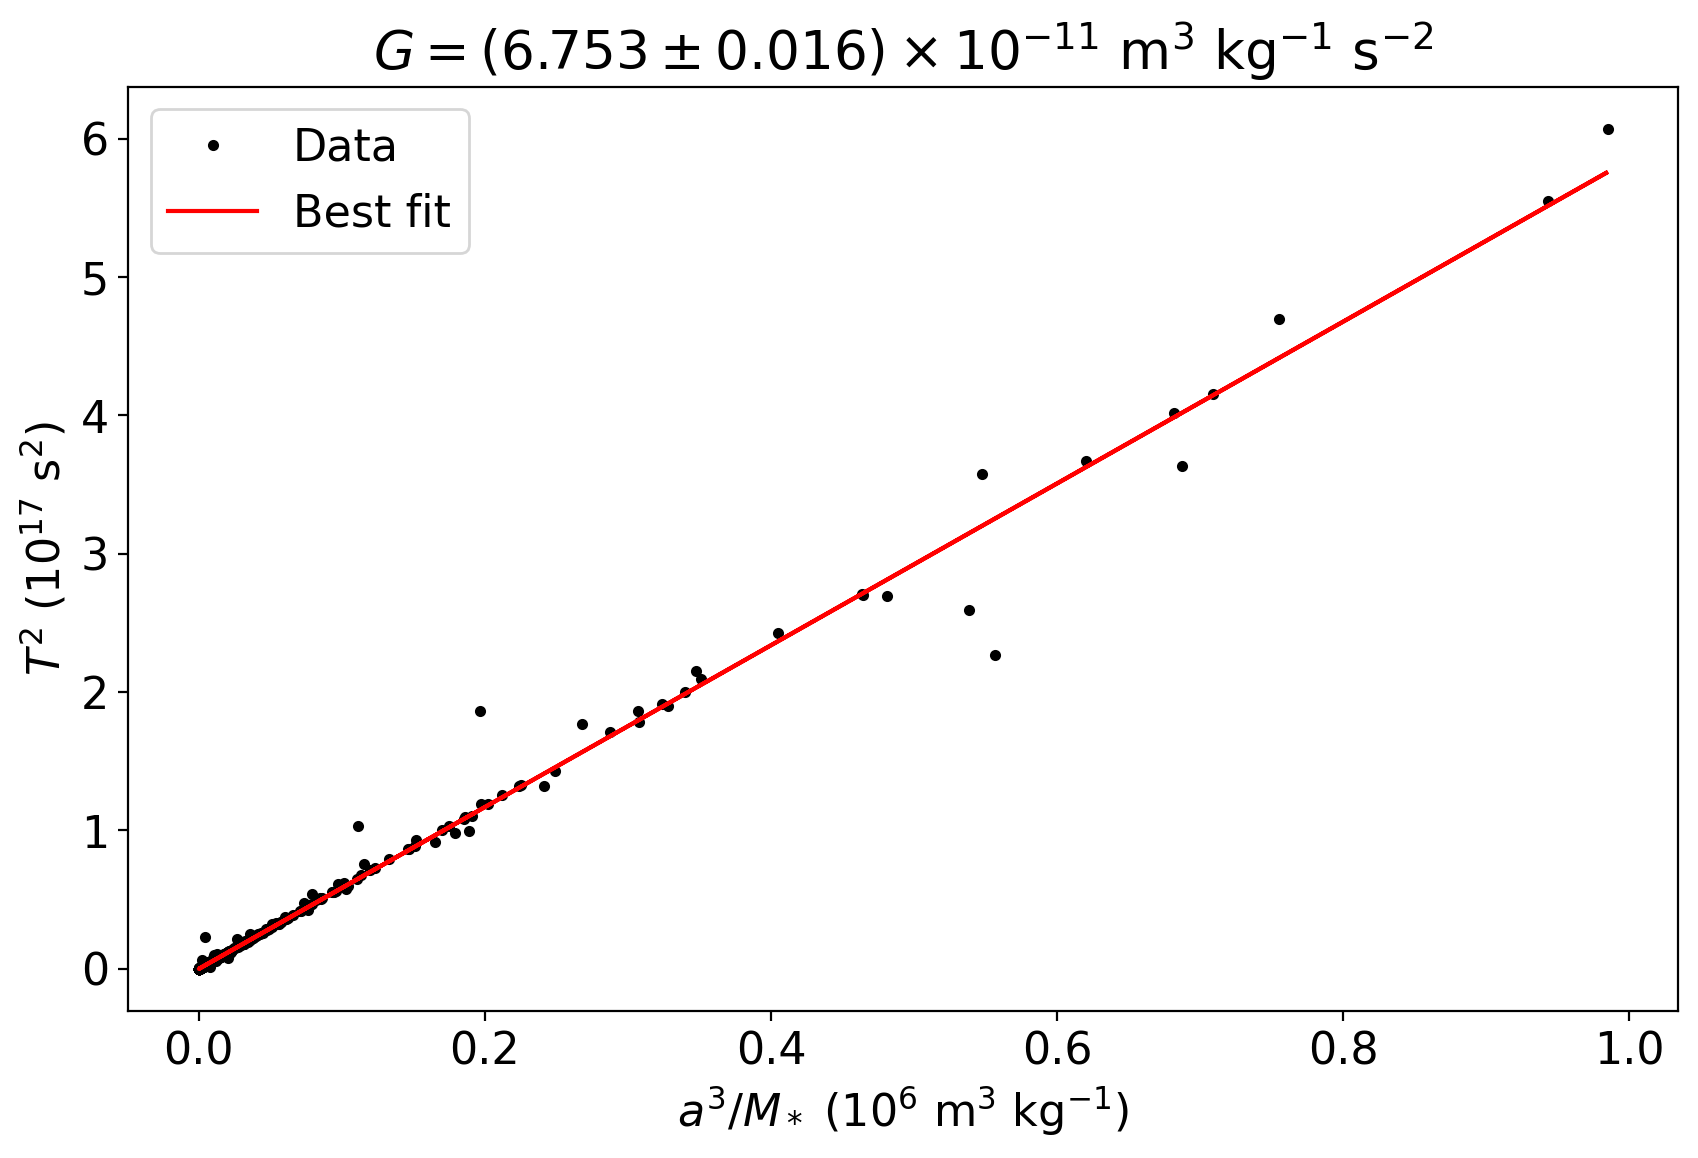

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(kepler_df['a_3_m']/1e6, kepler_df['T_sq'] / 1e17, 'k.',ls='None', label='Data')
ax.plot(kepler_df['a_3_m']/1e6, keplers_law(kepler_df['a_3_m'], g)/1e17, 'r-', label='Best fit')

ax.set_ylabel('$T^2$ ($10^{17}$ s$^2$)')
ax.set_xlabel('$a^3 / M_*$ ($10^6$ m$^3$ kg$^{-1}$)')

title_string = (r'$G = ({0:.3f} \pm {1:.3f}) \times 10^{{-11}}$ m$^{{3}}$ kg$^{{-1}}$ s$^{{-2}}$'.format((g / 1e-11), (g_unc / 1e-11)))
ax.set_title(title_string)
ax.legend()
plt.show()

[back to the worksheet](ex-estimate-g)